In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [61]:
ds = pd.read_csv("data/covid_19_data.csv", parse_dates=['Last Update'])
ds.rename(columns={'Country/Region':'Country'}, inplace=True)
ds.head()

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [62]:
ds_confirmed = pd.read_csv("data/time_series_covid_19_confirmed.csv")
ds_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
ds_confirmed.head(10)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,13,21,21,27,32,32,39,46,64,64
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,22,26,28,38,48,55,65,65,92,112
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,10,10,11,11,15,18,21,21,36,49
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,13,13,13,15,15,18,20,20,35,46
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,1,1,2,2,2,3,3,5,7


In [63]:
ds_death = pd.read_csv("data/time_series_covid_19_deaths.csv")
ds_death.rename(columns={'Country/Region':'Country'}, inplace=True)
ds_death.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
ds_recovered = pd.read_csv("data/time_series_covid_19_recovered.csv")
ds_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
ds_recovered.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,31,33,34,34,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,43,46,76,76,76,101,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,78,96,96,97,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,22,23,24,24,24,26,26,26,35


## Latest Cases

In [65]:
ds.tail()

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
5627,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0
5628,5629,03/14/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5629,5630,03/14/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5630,5631,03/14/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0
5631,5632,03/14/2020,NaN,occupied Palestinian territory,2020-03-11 20:53:02,0.0,0.0,0.0


In [66]:
ds_countywise = ds.groupby(['ObservationDate','Country'])[['ObservationDate','Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [67]:
ds_countywise.head()

,ObservationDate,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Japan,2.0,0.0,0.0
2,01/22/2020,Macau,1.0,0.0,0.0
3,01/22/2020,Mainland China,547.0,17.0,28.0
4,01/22/2020,South Korea,1.0,0.0,0.0


In [68]:
ds.query('Country == "Mainland China"').groupby("Last Update")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 17:00:00,547.0,17.0,28.0
1,2020-01-23 17:00:00,639.0,18.0,30.0
2,2020-01-24 17:00:00,916.0,26.0,36.0
3,2020-01-25 17:00:00,1399.0,42.0,39.0
4,2020-01-26 16:00:00,2062.0,56.0,49.0
...,...,...,...,...
726,2020-03-14 09:53:08,1348.0,22.0,1323.0
727,2020-03-14 10:13:09,67790.0,3075.0,52960.0
728,2020-03-14 12:53:06,140.0,4.0,78.0
729,2020-03-14 23:33:02,174.0,2.0,172.0


In [69]:
ds.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,58.0,0.0,0.0
3,Albania,118.0,4.0,0.0
4,Algeria,238.0,6.0,28.0
...,...,...,...,...
151,Uruguay,4.0,0.0,0.0
152,Vatican City,4.0,0.0,0.0
153,Venezuela,2.0,0.0,0.0
154,Vietnam,798.0,0.0,438.0


## Visualization

In [70]:
ds.groupby('ObservationDate').sum().head()

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


### Summary Plot of worldwide cases - Confirmed, Deaths and Recovered

In [71]:
confirmed = ds.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed.head()
deaths = ds.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = ds.groupby('ObservationDate').sum()['Recovered'].reset_index()

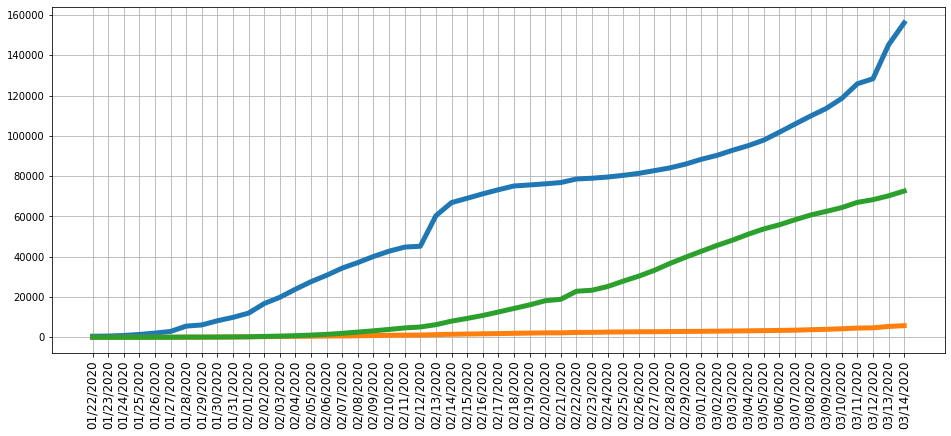

In [72]:
plt.figure(figsize=(16,14))
plt.subplot(211)
plt.plot(confirmed['ObservationDate'],confirmed['Confirmed'], linewidth=5.0)
plt.plot(confirmed['ObservationDate'],deaths['Deaths'], linewidth=5.0)
plt.plot(confirmed['ObservationDate'],recovered['Recovered'], linewidth=5.0)
plt.xticks(rotation=90, fontsize=12)
plt.grid(True)
plt.show()

In [47]:
ds_confirmed = ds_confirmed[['Province/State','Lat','Long','Country']]
ds_lat_long = pd.merge(ds, ds_confirmed, on=["Province/State", "Country"])

In [54]:
fig = px.scatter_mapbox(ds_lat_long,
                       lat="Lat",
                       lon="Long",
                       hover_name="Province/State",
                       hover_data=["Confirmed","Deaths","Recovered"],
                       animation_frame="ObservationDate",
                       color_continuous_scale="Portland",
                       zoom=2, height=700)
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Latest date in Data

In [73]:
ds_concise = ds.groupby(["ObservationDate","Country"])[["ObservationDate","Country","Confirmed","Deaths","Recovered"]].sum().reset_index()

In [74]:
ds_concise

,ObservationDate,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Japan,2.0,0.0,0.0
2,01/22/2020,Macau,1.0,0.0,0.0
3,01/22/2020,Mainland China,547.0,17.0,28.0
4,01/22/2020,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
2582,03/14/2020,United Arab Emirates,85.0,0.0,17.0
2583,03/14/2020,Uruguay,4.0,0.0,0.0
2584,03/14/2020,Venezuela,2.0,0.0,0.0
2585,03/14/2020,Vietnam,53.0,0.0,16.0


In [75]:
confirmed = ds_concise.groupby(['ObservationDate','Country']).sum()[['Confirmed']].reset_index()
deaths = ds_concise.groupby(['ObservationDate','Country']).sum()[['Deaths']].reset_index()
recovered = ds_concise.groupby(['ObservationDate','Country']).sum()[['Recovered']].reset_index()

In [76]:
latest_date = confirmed["ObservationDate"].max()
latest_date

'03/14/2020'

In [77]:
confirmed = confirmed[(confirmed['ObservationDate']==latest_date)][['Country','Confirmed']]
deaths = deaths[(deaths['ObservationDate']==latest_date)][['Country','Deaths']]
recovered = recovered[(recovered['ObservationDate']==latest_date)][['Country','Recovered']]

### Affected Countries

In [80]:
affected_countries = confirmed['Country'].unique()
print("Number pf all countries with cases: " + str(len(affected_countries)))
print("Countries with cases: ")
for i in affected_countries:
    print("    "+ str(i))

Number pf all countries with cases: 143
Countries with cases: 
    Afghanistan
    Albania
    Algeria
    Andorra
    Antigua and Barbuda
    Argentina
    Armenia
    Aruba
    Australia
    Austria
    Azerbaijan
    Bahrain
    Bangladesh
    Belarus
    Belgium
    Bhutan
    Bolivia
    Bosnia and Herzegovina
    Brazil
    Brunei
    Bulgaria
    Burkina Faso
    Cambodia
    Cameroon
    Canada
    Cayman Islands
    Chile
    Colombia
    Congo (Kinshasa)
    Costa Rica
    Croatia
    Cuba
    Curacao
    Cyprus
    Czech Republic
    Denmark
    Dominican Republic
    Ecuador
    Egypt
    Estonia
    Eswatini
    Ethiopia
    Finland
    France
    French Guiana
    Gabon
    Georgia
    Germany
    Ghana
    Greece
    Guadeloupe
    Guatemala
    Guernsey
    Guinea
    Guyana
    Holy See
    Honduras
    Hungary
    Iceland
    India
    Indonesia
    Iran
    Iraq
    Ireland
    Israel
    Italy
    Ivory Coast
    Jamaica
    Japan
    Jersey
    Jordan
    Kazakhsta